# Importing Libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing all the relevant libraries needed.
import pandas as pd
import sklearn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN

# Importing datasets

In [3]:
# Reading the csv file "x_train_all.csv"
df = pd.read_csv("x_train_all.csv")

In [4]:
# Intialising all Y train set in OneVsAll.
Y_train0 = pd.read_csv("./OnevrsAll/0_vrs_all/y_train_0.csv")
Y_train1 = pd.read_csv("./OnevrsAll/1_vrs_all/y_train_1.csv")
Y_train2 = pd.read_csv("./OnevrsAll/2_vrs_all/y_train_2.csv")
Y_train3 = pd.read_csv("./OnevrsAll/3_vrs_all/y_train_3.csv")
Y_train4 = pd.read_csv("./OnevrsAll/4_vrs_all/y_train_4.csv")
Y_train5 = pd.read_csv("./OnevrsAll/5_vrs_all/y_train_5.csv")
Y_train6 = pd.read_csv("./OnevrsAll/6_vrs_all/y_train_6.csv")
Y_train7 = pd.read_csv("./OnevrsAll/7_vrs_all/y_train_7.csv")
Y_train8 = pd.read_csv("./OnevrsAll/8_vrs_all/y_train_8.csv")
Y_train9 = pd.read_csv("./OnevrsAll/9_vrs_all/y_train_9.csv")

In [5]:
# Reading Y trainset of different classes in OneVSAll.
y_train_array = [Y_train0,Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9]

In [6]:
# Reading the csv file "y_train_all.csv"
train_y_df = pd.read_csv("y_train_all.csv")

# Data Visulaization and Exploration

In [7]:
# Retrieving the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [8]:
# Retrieving the information on the shape of the data.
df.shape

(9690, 2304)

In [9]:
# Printing the first five rows of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


### Pixel Intensity Histogram

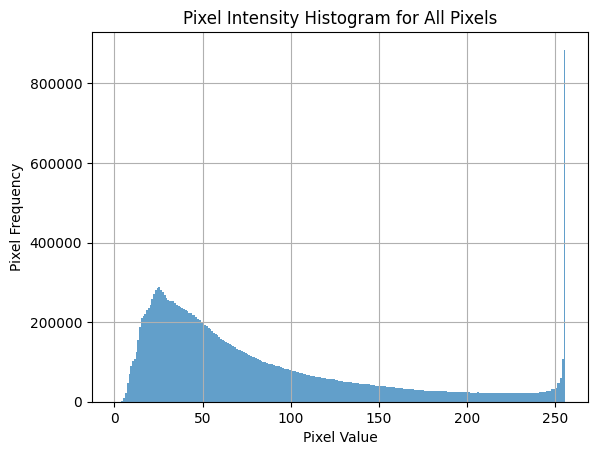

In [10]:
# Flattens the dataframe df into a 1 dimensional array to plot the histogram.
reshaped_df = df.values.ravel()
# Creates the histogram to view the pixel intensity.
plt.hist(reshaped_df, bins=256, range=(0, 256), alpha=0.7)
# Labels the x - axis as Pixel Value.
plt.xlabel('Pixel Value')
# Labels the y - axis as Pixel Frequency.
plt.ylabel('Pixel Frequency')
# Labels the title as Pixel Intensity Histogram for All Pixels.
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the grid lines on the histogram.
plt.grid(True)
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the histogram.
plt.show()

### Visualizing the image

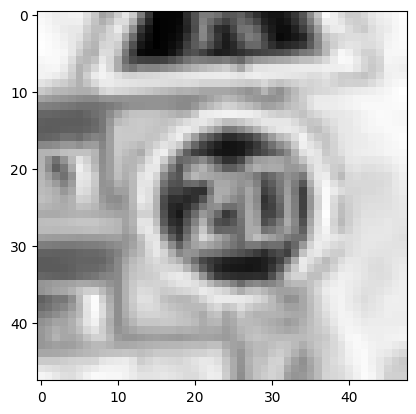

In [11]:
# Storing the images in visualize_img.
visualize_img = df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

# Image Enhancement Technique

### Histogram Equalization

In [12]:
# Reshapes the dataframe df into 3D array in the shape 48x48 grid to represent
# in form of image.
reshaped_df = df.values.reshape(-1, 48, 48)

# Initializing the list to store images after applying equalization.
equalized_df = []

# Iterating through all the images to apply histogram equalisation.
for image in reshaped_df:
    # Checking if the image is in the greyscale format and is 8-bit.
    if image.dtype != np.uint8:
        # Converting the image to 8 - bit otherwise.
        image = cv2.convertScaleAbs(image)  # Convert to 8-bit image if needed.

    # Applying histogram equalisation to the image to enchance the contrast.
    equalized_img = cv2.equalizeHist(image)

    # Adding the enchanced image to the equalized_df.
    equalized_df.append(equalized_img)

# Converting the list into NumPy array.
equalized_df = np.array(equalized_df)


In [13]:
# Storing the no. of images and dimensions of equalized_df.
n_img, height, width = equalized_df.shape

# Reshaping the array into two - dimensional array.
equalized_ndf = equalized_df.reshape(n_img, -1)

# Converting the array equalized_ndf into a dataframe.
ndf = pd.DataFrame(equalized_ndf)

### Gamma Correction

In [14]:
# Setting the gamma value for gamma correction.
gamma = 0.62
# Applying gamma correction on the dataframe ndf.
gamma_corrected_ndf = ndf.apply(lambda x: 255 * (x / 255) ** (1 / gamma))

# Data Preprocessing

### Normalizing the dataset

In [15]:
# Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
max_pixel= 255
# Normalizing the dataframe gamma_corrected_ndf.
normalized_df = gamma_corrected_ndf.divide(max_pixel)

In [16]:
# Printing the first five rows of the normalized_df.
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.015170,0.012679,0.009270,0.038780,0.081784,0.135948,0.257663,0.402310,0.384562,0.415820,...,0.081784,0.020645,0.001761,0.009270,0.046400,0.170000,0.199962,0.189770,0.170000,0.154164
1,0.005387,0.009270,0.025159,0.020645,0.012679,0.009270,0.107567,0.269092,0.515050,0.443346,...,0.170000,0.147996,0.069921,0.015170,0.000402,0.005387,0.052450,0.206869,0.217395,0.217395
2,0.007229,0.015170,0.036957,0.026738,0.050402,0.130071,0.257663,0.288555,0.099552,0.138924,...,0.203404,0.176498,0.121442,0.040636,0.010361,0.004546,0.012679,0.040636,0.130071,0.176498
3,0.003759,0.009270,0.020645,0.063147,0.176498,0.288555,0.320758,0.199962,0.007229,0.228119,...,0.337341,0.166786,0.121442,0.079355,0.038780,0.013903,0.009270,0.013903,0.072237,0.130071
4,0.022112,0.022112,0.016479,0.012679,0.044447,0.113040,0.224523,0.269092,0.094340,0.089236,...,0.196542,0.179782,0.186418,0.196542,0.186418,0.124293,0.054529,0.001229,0.003031,0.012679


In [17]:
# Retrieving the information on the shape of the data.
normalized_df.shape

(9690, 2304)

In [18]:
# Converting the normalized data to an array
data_array = normalized_df.values

### Checking for Null Values

In [19]:
# Checking for any null values in the dataframe.
null_values = normalized_df.isnull().sum().sum()
# Printing the number of null values.
print("Total Number of Null Values:", null_values)

Total Number of Null Values: 0


### Images after applying image enhancement techniques 

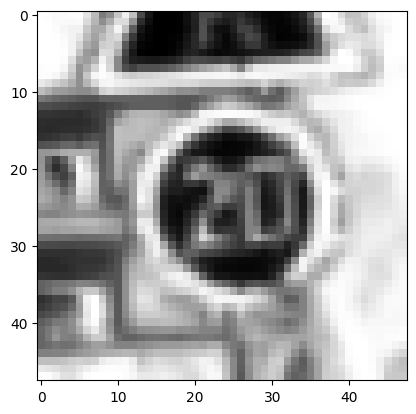

In [20]:
# Storing the images in visualize_img.
visualize_img = normalized_df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

## Outlier Mining

### DBSCAN

In [21]:
# Setting the value for epsilon parameter for DBSCAN.
eps = 11.0
# Setting the value for minimum sample parameter for DBSCAN.
min_samples = 80
# Intialsing the model for DBSCAN.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# Fitting the model to the data_array.
dbscan.fit(data_array)
# Labels all the outliers.
outlier_labels = dbscan.labels_

In [22]:
# Printing the total number of outliers.
num_outliers = np.sum(outlier_labels == -1)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 3680


In [23]:
# Finding all the places where the outliers lie.
outlier_indices = np.where(outlier_labels == -1)[0]
# Coverting it into a list
outlier_indices = outlier_indices.tolist()
# Printing the list of outliers.
print("Outlier List : ",outlier_indices)

Outlier List :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 111, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,

### Scatter Plot for Outlier Visualization

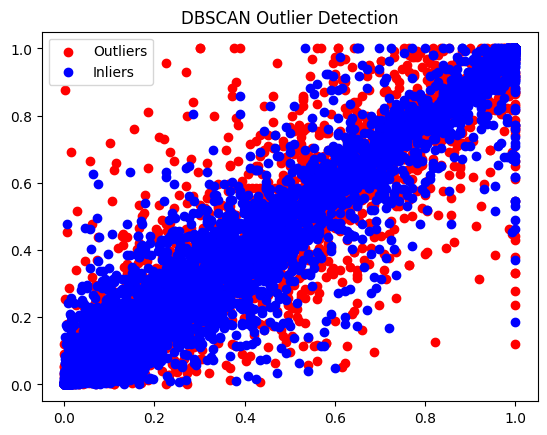

In [24]:
# Creating  a scatter plot to visualize the outliers in the dataset.
plt.scatter(data_array[outlier_labels == -1, 0], data_array[outlier_labels == -1, 1], c='red', label='Outliers')
# Here the red represents the outliers and blue represents inliers.
plt.scatter(data_array[outlier_labels != -1, 0], data_array[outlier_labels != -1, 1], c='blue', label='Inliers')
plt.legend()
# Lablelling the Plot.
plt.title('DBSCAN Outlier Detection')
plt.show()

In [25]:
# Removing all the outliers in the dataframe.
def removeOutliers(dataframe):
    dataframe.drop(dataframe.index[outlier_indices], axis=0, inplace=True)

In [26]:
# Calling the function to  remove the outliers.
removeOutliers(normalized_df)

In [27]:
# Checking the dimension of normalized_df after removing the outliers.
normalized_df.shape

(6010, 2304)

In [28]:
# Removing the outliers in the y_train dataset.
for i in range(len(y_train_array)):
    removeOutliers(y_train_array[i])

In [29]:
# # Checking the dimension of one of the y_train files after removing the outliers.
# Y_train2.shape

In [30]:
# Removing the outliers in train_y_df.
removeOutliers(train_y_df)

In [31]:
    # # Checking the dimension of  train_y_df files after removing the outliers.
    # train_y_df.shape

# Feature Selection

### Creating datasets with top 5, 10 and 20 features using SelectKBest

In [32]:
# The function returns the top n features for the given dataset.
# Here the n is the number of feature and y is the training dataset.
def top_features(n,y):
    # Intialising the SelectKBest to find the top n features.
    select = SelectKBest(score_func=chi2, k=n)
    # Fitting the SelectKBest to normalized_df
    z = select.fit_transform(normalized_df,y)
    # Here we are filtering all features that are selected as the top features
    filter = select.get_support()
    # Getting the name of the features.
    col_name = normalized_df.columns.values.tolist()
    # Selecting the top features.
    fea = array(col_name)[filter]
    # Returning the top features
    return fea


In [33]:
# This function return all the top n unique features for each class.
def select_features(n):
    # Stores all the features.
    temp_lst = []
    # Iterates through training data set gets the top n features
    for i in range(len(y_train_array)):
        feature_5=top_features(n,y_train_array[i])
        #Iterates through the list and see if the feature is unique.
        for i in feature_5:
            if i not in temp_lst:
                # Adds the feature to the list.
                temp_lst.append(i)
    # Returns the unique features.
    return temp_lst


In [34]:
# Gets the top 5 features for all classes and adds it into a excel.
df_top5 = normalized_df.filter(select_features(5), axis=1)
df_top5.to_excel('Top5.xlsx', index=False)
# Gets the top 10 features for all classes and adds it into a excel.
df_top10 = normalized_df.filter(select_features(10), axis=1)
df_top10.to_excel('Top10.xlsx', index=False)
# Gets the top 20 features for all classes and adds it into a excel.
df_top20 = normalized_df.filter(select_features(20), axis=1)
df_top20.to_excel('Top20.xlsx', index=False)

In [35]:
# Printing the first five rows of the df_top5 to check.
df_top5.head()

,1267,1314,1315,1362,1409,1029,1030,1077,1366,1461,...,1761,794,1166,1167,1215,1263,1744,1666,1667,1695
10,0.424921,0.424921,0.457359,0.253896,0.452670,0.524916,0.544862,0.519974,0.925200,0.443346,...,0.127170,0.925200,0.937513,0.937513,0.943693,0.956098,0.023617,0.084240,0.069921,0.031691
16,0.312586,0.434096,0.166786,0.096933,0.228119,0.805512,0.154164,0.565090,0.882594,0.183088,...,0.220948,0.852631,0.968565,0.956098,0.968565,0.968565,0.030005,0.203404,0.063147,0.019217
17,0.731137,0.788106,0.490696,0.648766,0.725529,0.823062,0.622146,0.852631,0.882594,0.554941,...,0.524916,0.993682,0.943693,0.943693,0.943693,0.943693,0.115815,0.748057,0.420361,0.130071
18,0.193145,0.269092,0.118616,0.017828,0.033412,0.519974,0.138924,0.312586,0.925200,0.590766,...,0.341537,0.876570,0.956098,0.943693,0.956098,0.956098,0.485879,0.333166,0.118616,0.585596
19,0.118616,0.354240,0.118616,0.130071,0.203404,0.675806,0.170000,0.515050,0.931349,0.708806,...,0.452670,0.876570,0.943693,0.937513,0.943693,0.931349,0.495531,0.616874,0.186418,0.549893


In [36]:
# Checking the dimension of df_top5.
df_top5.shape

(6010, 37)

# Data Visualisation

In [37]:
# Loading CSV files
dy = pd.read_csv('y_train_all.csv')  
dx = pd.read_csv('x_train_all.csv') 

class_ranges = {}
current_class = dy.iloc[0, 0]  # Get first class label
start_row = 0

# Iterate through the y_train_all dataset to find row ranges for each class
for i in range(1, len(dy)):
    if dy.iloc[i, 0] != current_class:
        end_row = i - 1
        class_ranges[current_class] = (start_row, end_row)
        current_class = dy.iloc[i, 0]
        start_row = i

# Adding the last class range
end_row = len(dy) - 1
class_ranges[current_class] = (start_row, end_row)

# Printing the row ranges for each class in y_train_all dataset
print("Row ranges for each class label in y_train:")
for class_label, (start, end) in class_ranges.items():
    print(f"Class {class_label}: Rows {start} to {end}")

# applying same row ranges to x_train_all
class_ranges_x_train = {}

for class_label, (start, end) in class_ranges.items():
    x_train_subset = dx.iloc[start:end+1]
    class_ranges_x_train[class_label] = x_train_subset

# Printing the row ranges for each class label in x_train
print("\nRow ranges for each class label in x_train:")
for class_label, x_train_subset in class_ranges_x_train.items():
    print(f"Class {class_label}: Rows {x_train_subset.index[0]} to {x_train_subset.index[-1]}")

Row ranges for each class label in y_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689

Row ranges for each class label in x_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689


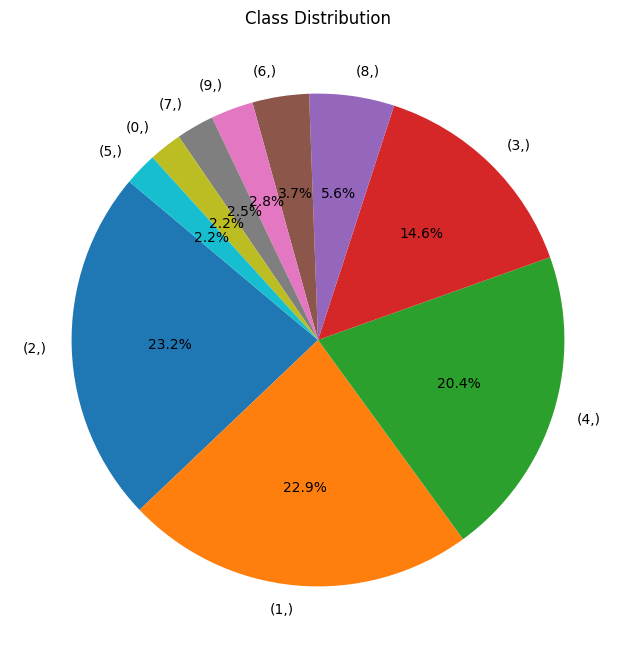

In [38]:
# Loading the data
data = pd.read_csv('y_train_all.csv')

# Counting the occurrences of each class
class_counts = data.value_counts()

# Geting the class labels and their counts
labels = class_counts.index
counts = class_counts.values

# Creating a pie chart
plt.figure(figsize=(8, 8))

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')

# Display the chart
plt.show()

# K - Means Clustering

In [39]:
#Importing library
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [40]:
#Reading Test files
test_X_df = pd.read_csv("x_test_all.csv")
test_y_df = pd.read_csv("y_test_all.csv")

In [41]:
#reading file with top 5, 10 and 20 features for each class
df_5 = pd.read_excel("Top5.xlsx")
df_10 = pd.read_excel("Top10.xlsx")
df_20 = pd.read_excel("Top20.xlsx")

## Training the model

In [42]:
#importing library for generating metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [43]:
# kmeans = KMeans(n_clusters = 10, random_state = 42, n_init='auto')
kmeans = KMeans(n_clusters = 10, n_init=50)
kmeans_5 = KMeans(n_clusters = 10, n_init=50)
kmeans_10 = KMeans(n_clusters = 10, n_init=50)
kmeans_10 = KMeans(n_clusters = 10, n_init=50)
kmeans_20 = KMeans(n_clusters = 10, n_init=50)


### Complete Training data

In [44]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
10,0.406795,0.434096,0.341537,0.094340,0.023617,0.272943,0.654140,0.919067,0.974821,0.993682,...,0.505254,0.406795,0.333166,0.253896,0.193145,0.135948,0.052450,0.031691,0.031691,0.046400
16,0.692232,0.288555,0.132997,0.074581,0.074581,0.362807,0.670365,0.782336,0.782336,0.753729,...,0.510143,0.393398,0.384562,0.565090,0.575308,0.616874,0.670365,0.312586,0.074581,0.001229
17,0.643408,0.670365,0.284621,0.141923,0.130071,0.217395,0.703265,0.931349,0.993682,1.000000,...,0.443346,0.203404,0.130071,0.115815,0.076954,0.036957,0.003031,0.000773,0.003031,0.063147
18,0.250149,0.170000,0.179782,0.239038,0.632743,0.770845,0.759418,0.748057,0.742400,0.736760,...,0.025159,0.017828,0.011498,0.013903,0.033412,0.033412,0.044447,0.044447,0.044447,0.013903
19,0.415820,0.170000,0.186418,0.250149,0.544862,0.742400,0.742400,0.731137,0.708806,0.643408,...,0.012679,0.007229,0.019217,0.040636,0.019217,0.019217,0.012679,0.010361,0.019217,0.107567


In [45]:
X1_train_array = normalized_df.values
kmeans.fit(X1_train_array)
clusters = kmeans.predict(normalized_df)

#checking Accuracy, Precision, Recall Score and Mean Absolute Error
print('Model Accuracy Score : {:.4f}'.format(accuracy_score(train_y_df,clusters)))
print("Precision Score : {:.4f}".format(precision_score(train_y_df, clusters, average='micro')))
print("Recall Score : {:.4f}".format(recall_score(train_y_df, clusters, average='micro')))
print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(train_y_df,clusters)))
print()
print()

Model Accuracy Score : 0.1301
Precision Score : 0.1301
Recall Score : 0.1301
Mean Absolute Error : 3.0068




# normalized_df - 2 clusters

Silhouette Score: 0.35481790230298016
Davies-Bouldin Index: 1.2148057747210905
Calinski-Harabasz Index: 2990.47072522668


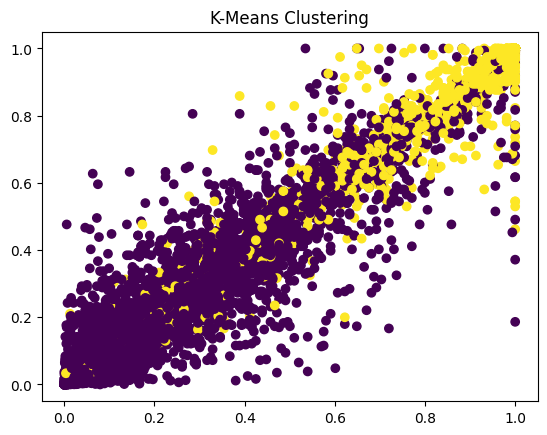

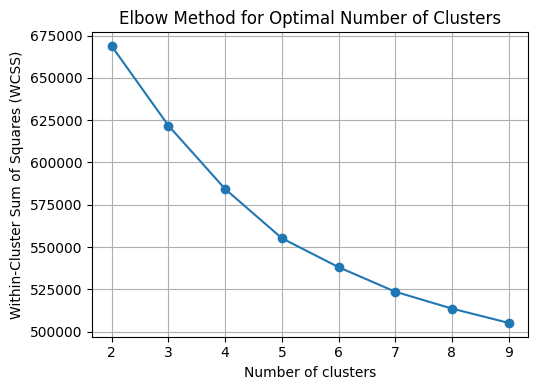

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = normalized_df.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(X1_train_array)
clusters = kmeans.predict(normalized_df)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(normalized_df, clusters)
db_index = davies_bouldin_score(normalized_df, clusters)
ch_score = calinski_harabasz_score(normalized_df, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(X1_train_array)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

# normalized_df - 10 clusters

Silhouette Score: 0.09244318770888746
Davies-Bouldin Index: 2.4851531782365477
Calinski-Harabasz Index: 677.0327356843302


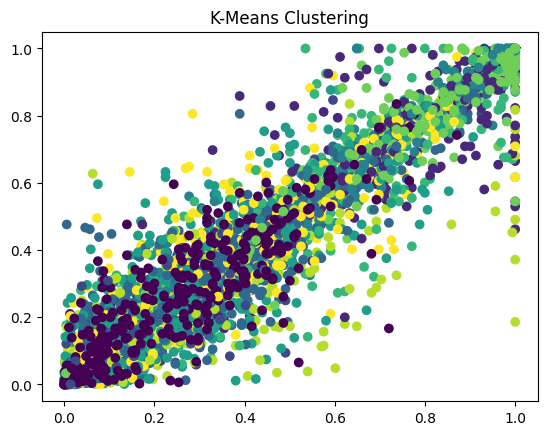

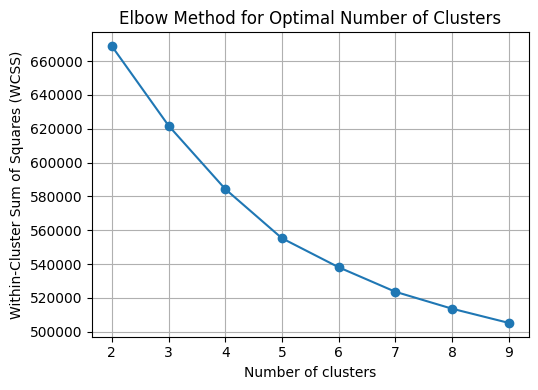

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = normalized_df.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(X1_train_array)
clusters = kmeans.predict(normalized_df)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(normalized_df, clusters)
db_index = davies_bouldin_score(normalized_df, clusters)
ch_score = calinski_harabasz_score(normalized_df, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(X1_train_array)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

In [48]:
cluster_labels = kmeans.labels_

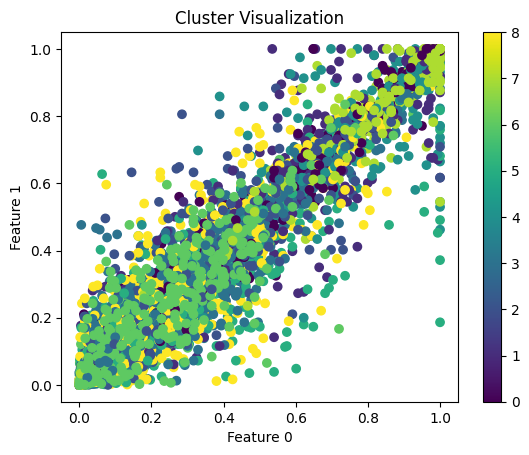

In [49]:
#Plotting in 2D space.
plt.scatter(X1_train_array[:, 0], X1_train_array[:, 1], c=cluster_labels)
plt.title("Cluster Visualization")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.colorbar()  # Add a colorbar for reference
plt.show()

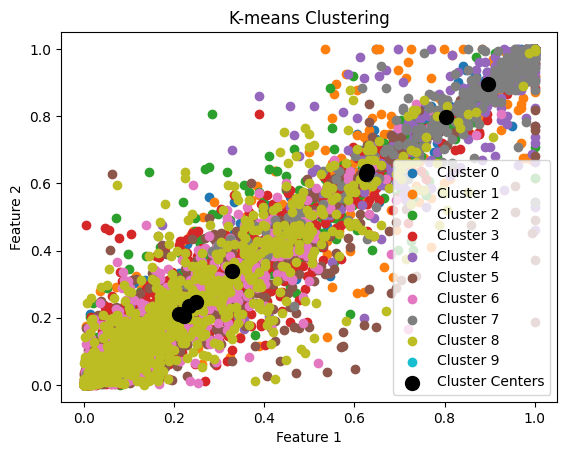

In [50]:
# Create a scatter plot for each cluster with cluster centers
for cluster in range(10):  # n_clusters is the number of clusters in your K-means model
    plt.scatter(X1_train_array[cluster_labels == cluster, 0], X1_train_array[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

# Plot cluster centers (optional)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='o', s=100, label='Cluster Centers')

# silhouette_avg = silhouette_score(X1_train_array, cluster_labels)
# db_index = davies_bouldin_score(X1_train_array, cluster_labels)

# print(f"Silhouette Score: {silhouette_avg}")
# print(f"Davies-Bouldin Index: {db_index}")

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [51]:
# result_df = normalized_df.copy()
# result_df['Cluster'] = clusters

### Top 5

In [52]:
kmeans_5.fit(df_5.values)

clusters = kmeans_5.predict(df_5)

print('Model Accuracy Score : {:.4f}'.format(accuracy_score(train_y_df,clusters)))
print("Precision Score : {:.4f}".format(precision_score(train_y_df, clusters, average='micro')))
print("Recall Score : {:.4f}".format(recall_score(train_y_df, clusters, average='micro')))
print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(train_y_df,clusters)))
print()
print()

Model Accuracy Score : 0.1306
Precision Score : 0.1306
Recall Score : 0.1306
Mean Absolute Error : 2.2775




# TOP_5 - 2 clusters

Silhouette Score: 0.49147853096137917
Davies-Bouldin Index: 0.7505783306280934
Calinski-Harabasz Index: 6108.733423909931


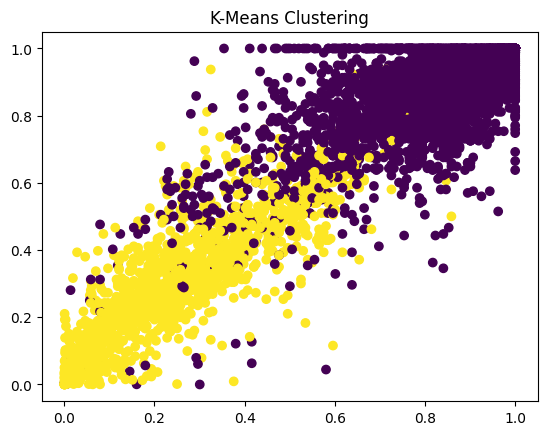

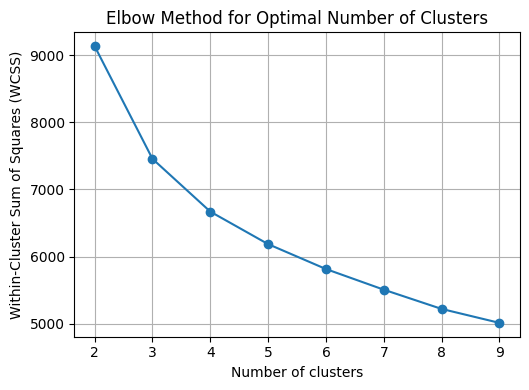

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_5.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 2
kmeans_5 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_5.fit(X1_train_array)
clusters = kmeans_5.predict(df_5)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_5, clusters)
db_index = davies_bouldin_score(df_5, clusters)
ch_score = calinski_harabasz_score(df_5, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_5.iloc[:, 0], df_5.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_5 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_5.fit(X1_train_array)
    inertia_values.append(kmeans_5.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

# TOP_5 - 10 clusters

Silhouette Score: 0.1798516900014849
Davies-Bouldin Index: 1.7441250425518675
Calinski-Harabasz Index: 1875.760535781189


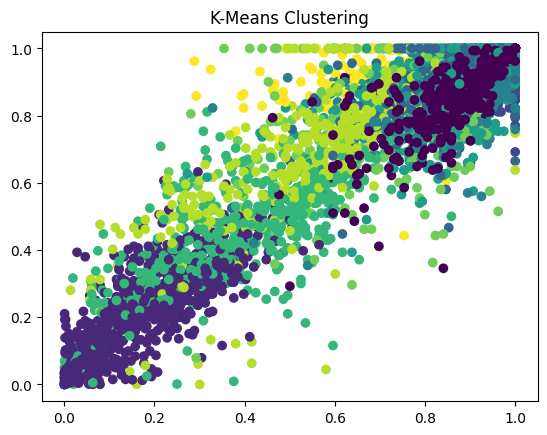

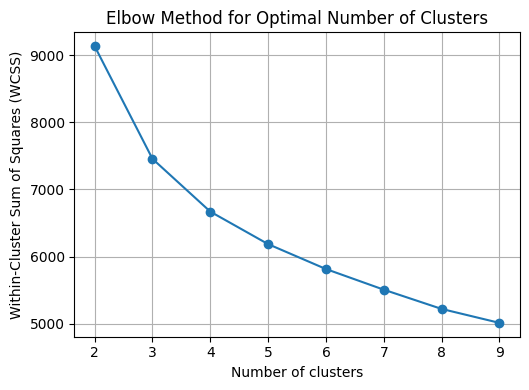

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_5.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 10
kmeans_5 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_5.fit(X1_train_array)
clusters = kmeans_5.predict(df_5)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_5, clusters)
db_index = davies_bouldin_score(df_5, clusters)
ch_score = calinski_harabasz_score(df_5, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_5.iloc[:, 0], df_5.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_5 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_5.fit(X1_train_array)
    inertia_values.append(kmeans_5.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

### Top 10

In [55]:
kmeans_10.fit(df_10.values)
clusters = kmeans_10.predict(df_10)

print('Model Accuracy Score : {:.4f}'.format(accuracy_score(train_y_df,clusters)))
print("Precision Score : {:.4f}".format(precision_score(train_y_df, clusters, average='micro')))
print("Recall Score : {:.4f}".format(recall_score(train_y_df, clusters, average='micro')))
print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(train_y_df,clusters)))
print()
print()

Model Accuracy Score : 0.0983
Precision Score : 0.0983
Recall Score : 0.0983
Mean Absolute Error : 3.0918




# TOP_10 - 2 clusters

Silhouette Score: 0.4823902944416354
Davies-Bouldin Index: 0.7793485849119693
Calinski-Harabasz Index: 5905.60525629822


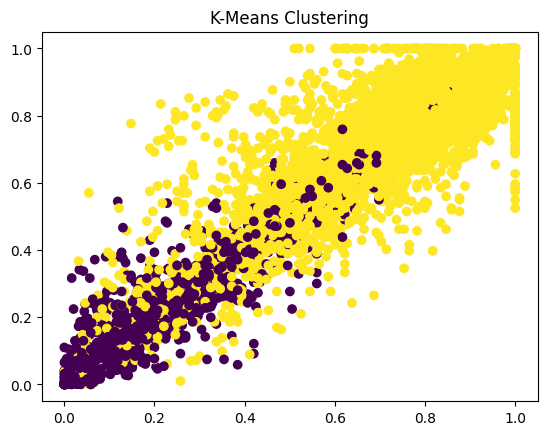

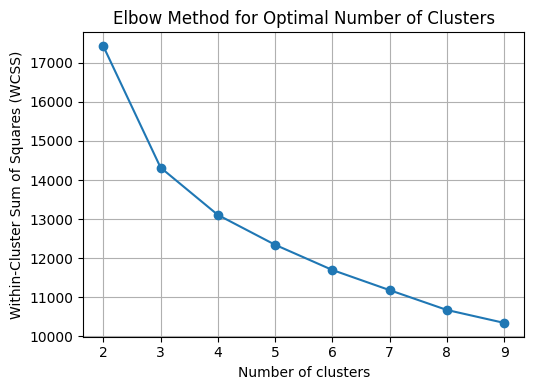

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_10.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 2
kmeans_10 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_10.fit(X1_train_array)
clusters = kmeans_10.predict(df_10)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_10, clusters)
db_index = davies_bouldin_score(df_10, clusters)
ch_score = calinski_harabasz_score(df_10, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_10.iloc[:, 0], df_10.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_10 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_10.fit(X1_train_array)
    inertia_values.append(kmeans_10.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

# TOP_10 - 10 clusters

Silhouette Score: 0.15221184323051248
Davies-Bouldin Index: 1.922984411565875
Calinski-Harabasz Index: 1620.5131841179816


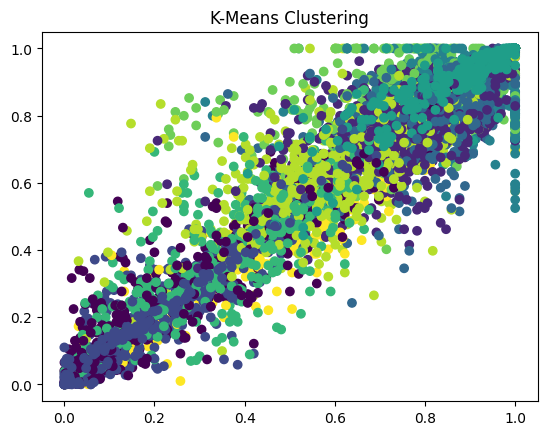

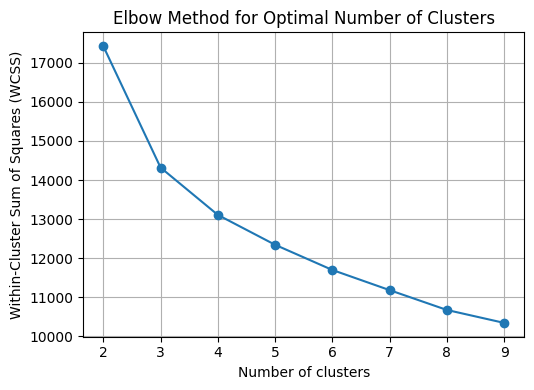

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_10.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 10
kmeans_10 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_10.fit(X1_train_array)
clusters = kmeans_10.predict(df_10)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_10, clusters)
db_index = davies_bouldin_score(df_10, clusters)
ch_score = calinski_harabasz_score(df_10, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_10.iloc[:, 0], df_10.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_10 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_10.fit(X1_train_array)
    inertia_values.append(kmeans_10.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

### Top 20

In [58]:
kmeans_20.fit(df_20.values)
clusters = kmeans_20.predict(df_20)

print('Model Accuracy Score : {:.4f}'.format(accuracy_score(train_y_df,clusters)))
print("Precision Score : {:.4f}".format(precision_score(train_y_df, clusters, average='micro')))
print("Recall Score : {:.4f}".format(recall_score(train_y_df, clusters, average='micro')))
print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(train_y_df,clusters)))
print()
print()

Model Accuracy Score : 0.1943
Precision Score : 0.1943
Recall Score : 0.1943
Mean Absolute Error : 2.7047




# TOP_20 - 2 clusters

Silhouette Score: 0.4661711199883718
Davies-Bouldin Index: 0.8305943349081563
Calinski-Harabasz Index: 5385.501758509734


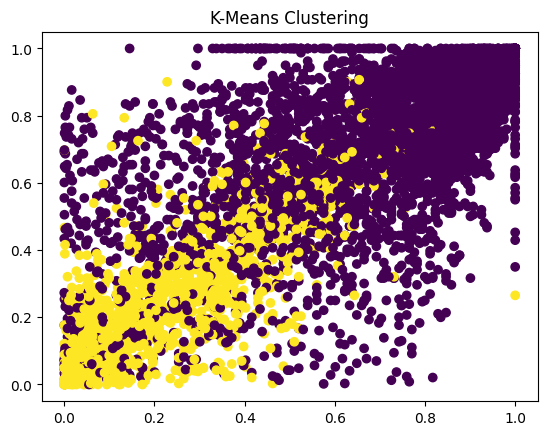

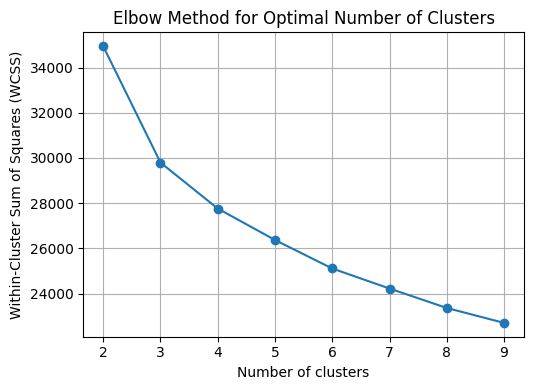

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_20.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 2
kmeans_20 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_20.fit(X1_train_array)
clusters = kmeans_20.predict(df_20)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_20, clusters)
db_index = davies_bouldin_score(df_20, clusters)
ch_score = calinski_harabasz_score(df_20, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_20.iloc[:, 0], df_20.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_20 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_20.fit(X1_train_array)
    inertia_values.append(kmeans_20.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

# TOP_20 - 10 clusters

Silhouette Score: 0.13003018052928605
Davies-Bouldin Index: 2.078125108558242
Calinski-Harabasz Index: 1333.1920015781814


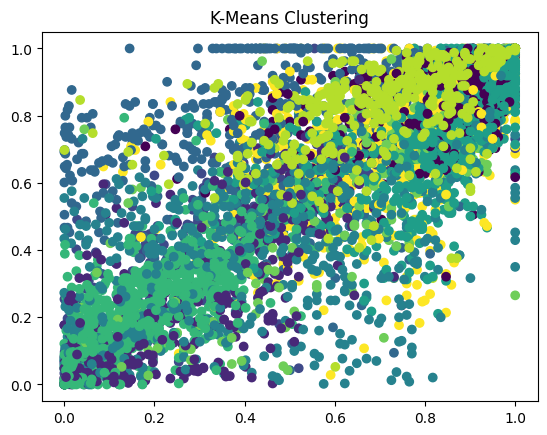

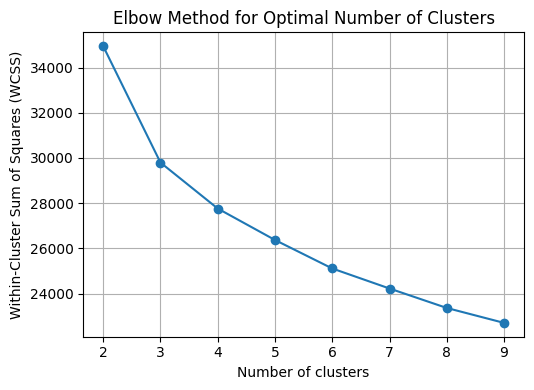

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Your data (normalized_df)
X1_train_array = df_20.values

# Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
n_clusters = 10
kmeans_20 = KMeans(n_clusters=n_clusters, n_init=50)
kmeans_20.fit(X1_train_array)
clusters = kmeans_20.predict(df_20)

# Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
silhouette_avg = silhouette_score(df_20, clusters)
db_index = davies_bouldin_score(df_20, clusters)
ch_score = calinski_harabasz_score(df_20, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_score}")

# Visualize clusters (assuming normalized_df is 2D)
plt.scatter(df_20.iloc[:, 0], df_20.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Elbow Method for Optimal Number of Clusters
cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
inertia_values = []  # Store the inertia (WCSS) for each cluster count

# Calculate the within-cluster sum of squares (inertia) for different cluster counts
for n_clusters in cluster_range:
    kmeans_20 = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans_20.fit(X1_train_array)
    inertia_values.append(kmeans_20.inertia_)

# Plot the inertia values to identify the elbow point
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

plt.tight_layout()
plt.show()

In [61]:
## Visulaizing Data using PCA

In [62]:
# train_y_df.head()

In [63]:
# # Specify a colormap
# colormap = cm.get_cmap('viridis')
# values = [0.1, 0.4, 0.7, 0.9]

In [64]:
# def training_with_diff_datasets_Kmeans (X_train, n_clusters, X_test = test_X_df, y_test = test_y_df):
#     X1_train, X1_test, y1_test = X_train, X_test, y_test
    
#     #Selecting same features in test dataset as train dataset
#     #columns in train dataset
#     cols_to_keep = X1_train.columns.tolist()
# #     print(len(cols_to_keep))

#     string_cols_to_keep = [str(x) for x in cols_to_keep]

#     #columns in test dataset
#     total_columns_in_test = X1_test.columns.tolist()
# #     print(len(total_columns_in_test))

#     #removing columns that do not belong to cols_to_keep
#     cols_to_remove = list(set(total_columns_in_test) - set(string_cols_to_keep))
# #     print(len(cols_to_remove))

#     #dropping columns to remove from test dataset
#     X_test_selected = X1_test.drop(cols_to_remove, axis=1)
#     X_test_selected1 = X_test_selected[string_cols_to_keep]
    
#     # selected = X_test_selected.columns.tolist()

#     #   X_test_selected = X1_test.drop(columns=[col for col in X1_test.columns if col not in cols_to_keep])
#     #   print(len(X_test_selected.columns.tolist()))

#     #   # print(len(selected))
#     #   # selected.sort()
#     #   # cols_to_keep.sort()
#     #   # print(selected)
#     #   # print(cols_to_keep)
#     #   # print(selected == cols_to_keep)

#     kmeans.fit(X1_train.values)
#     cluster_labels = kmeans.labels_
    
# #     score = accuracy_score(y_test,kmeans.predict(X_test))
# #     print('Accuracy:{0:f}'.format(score))
    
    
#     # Reduce the data to 2D using t-SNE
#     tsne = TSNE(n_components=2)
#     X_2D = tsne.fit_transform(X1_train)


#     # Create a scatter plot of the 2D data with cluster assignments
#     plt.scatter(X_2D[:, 0], X_2D[:, 1], c=n_clusters, cmap='viridis')
#     plt.title("GMM Cluster Visualization (t-SNE)")
#     plt.xlabel("Dimension 1")
#     plt.ylabel("Dimension 2")
#     plt.show()
    
    
    
# #     predict = k_means.predict(data)
# #     y_pred = kmeans.predict(X_test_selected1.values)

# #     X1_train_array = X1_train.values
    
#     # Visualize the clusters
#     # Create a scatter plot for each cluster
# #     for cluster in range(n_clusters):
# #         figsize=(12, 4)
# #         plt.scatter(X1_train_array[cluster_labels == cluster, 0], X1_train_array[cluster_labels == cluster, 1], label='Cluster' + str(cluster))
# #         plt.show()

#     # Plot cluster centers (optional)
# #     plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
# #     plt.show()

#     # Plot K-means clusters
# #     plt.subplot(1, 2, 2)
# #     plt.scatter(X1_train_array[:, 0], X1_train_array[:, 1], c=cluster_labels, cmap='viridis', s=50)
# #     plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
# #     plt.title("K-Means Clustering")

# #     plt.show()

# #     sns.boxplot(x = kmeans.labels_, y = y_train['0'])
    



In [65]:
# training_with_diff_datasets_Kmeans(normalized_df, 10)

In [66]:
# sns.scatterplot(data = normalized_df, x = 'longitude', y = 'latitude', hue = 'Class values')

In [67]:
# from sklearn.manifold import TSNE

# Silhouette

# Elbow Method

# Gap Statistics